<a href="https://colab.research.google.com/github/bioai96/Pytorch/blob/main/Pytorch_%EC%9B%8C%ED%81%AC%ED%94%8C%EB%A1%9C%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이토치 워크플로우

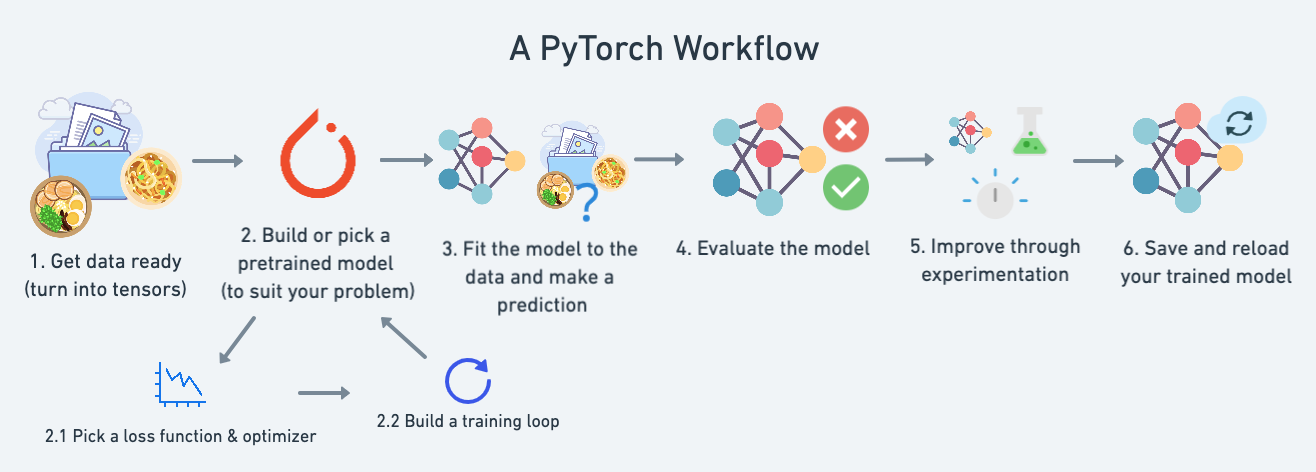

### 1. 데이터 준비하기

In [ ]:
import torch 
from torch import nn #파이토치에서 모델을 만들때, 신경망 모델의 여러가지 미리 구현된 레이어를 가져다가 쓸 수 있는 패키지
import matplotlib.pyplot as plt 

In [ ]:
weight = 0.5
bias = 0.1
#임의의 직선 데이터 생성

X = torch.arange(1,2,0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[1.0000],
         [1.0200],
         [1.0400],
         [1.0600],
         [1.0800],
         [1.1000],
         [1.1200],
         [1.1400],
         [1.1600],
         [1.1800]]), tensor([[0.6000],
         [0.6100],
         [0.6200],
         [0.6300],
         [0.6400],
         [0.6500],
         [0.6600],
         [0.6700],
         [0.6800],
         [0.6900]]))

In [ ]:
# Train Test 분할
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  plt.figure(figsize=(12,9))

  plt.scatter(train_data, train_labels, c= 'b',s=4, label="Train data")
  plt.scatter(test_data,test_labels, c = 'g', s= 4, label = 'Test data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s= 4, label = 'Predictions')

  plt.legend(prop={"size":18})

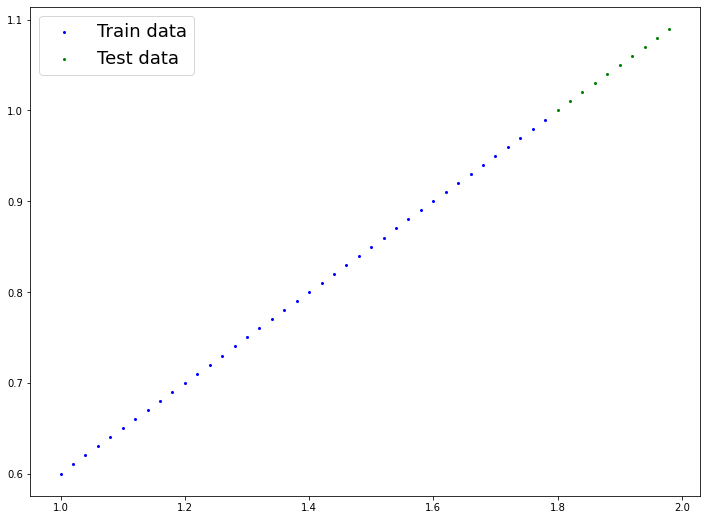

In [ ]:
plot_predictions()

## 2. 모델 구축

In [ ]:
# < 정해진 구조 > 
class 모델이름(nn.Moldule):
  def __init__(self): # 초기화
    super().init__()
    #사용할 레이어 종류와 입출력 크기 정의하기
    self.l1(input=10, output=20)
    self.l2(input=20, output=10)
    ...
  def forward(self, x): #x가 입력 받은 데이터를 말함 
    #입력 데이터 x를 가지고 어떠한 레이어를 거쳐 연산을 수행할지 순차적으로 나열함
    x2 = self.l1(x)
    output=self.l2(x2)
    return output

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):  #  복잡한 함수 --> (self, dropout_size, input_size)
    super().__init__() # 고정된 모양
    self.weights = nn.Parameter(torch.randn(1, 
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad =True,
                                         dtype=torch.float))
  
  def forward(self, x):
    return self.weights * x + self.bias 

### 모델 생성하고 정보 출력

In [ ]:
# 기존 수행했던 결과를 그대로 재현하기 위해 랜덤 초기화 시 고정 시드를 사용
# 기존에 생성되었던 랜덤 숫자 그대로 생성할 수 있도록 의도적으로 조정하는 것
torch.manual_seed(42)

model = LinearRegressionModel()

list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model

LinearRegressionModel()

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# 모델의 예측 생성해보기 test 데이터를 가지고
with torch.inference_mode(): # 
  y_preds = model(X_test)

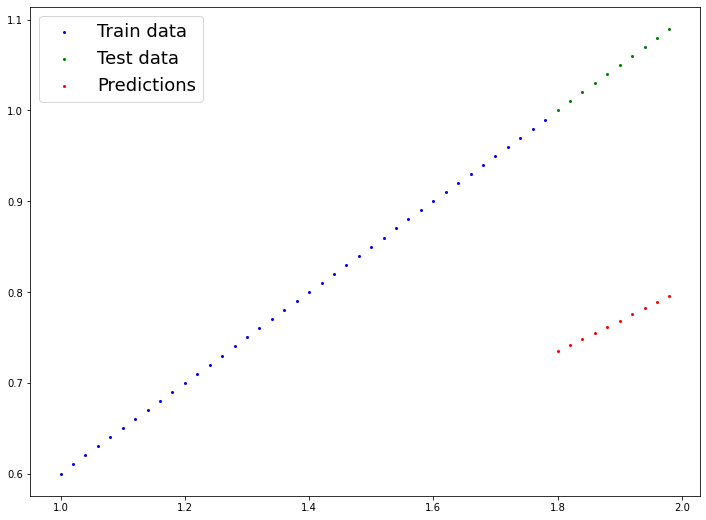

In [ ]:
plot_predictions(predictions=y_preds)
# 초기값으로는 이상한 값이 나옴


### 손실함수와 최적화 사용하기

In [ ]:
y_test - y_preds

tensor([[0.2651],
        [0.2684],
        [0.2717],
        [0.2749],
        [0.2782],
        [0.2815],
        [0.2847],
        [0.2880],
        [0.2913],
        [0.2945]])

In [ ]:
diff = y_test - y_preds
abs = torch.abs(diff)
abs

tensor([[0.2651],
        [0.2684],
        [0.2717],
        [0.2749],
        [0.2782],
        [0.2815],
        [0.2847],
        [0.2880],
        [0.2913],
        [0.2945]])

In [ ]:
#MAE (Mean Absolute Error)
torch.mean(abs)

tensor(0.2798)

In [ ]:
#손실함수
loss_fn = nn.L1Loss() # Mean Absolute Error L1loss이다.

#최적화 함수
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)


## 3. 모델 학습하기

In [ ]:
torch.manual_seed(42) # 재현성을 보장하기 위한, 다른사람이 해도 같은 결과를 보장하기 위한

epochs = 100

train_losses = []
test_losses = []
epoch_counts = []

for epoch in range(epochs):
  model.train()
  
  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad() # 최적화 함수 초기화 하기
  loss.backward()# 역전파 수행하라는 명령
  optimizer.step()# 파라미터를 최적화하라는 명령
  model.eval()

  with torch.inference_mode(): #그라디언트를 수정하지 않음
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_counts.append(epoch)
      train_losses.append(loss.detach().numpy())
      test_losses.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.19819101691246033 | MAE Test Loss: 0.24357476830482483
Epoch: 10 | MAE Train Loss: 0.013273736461997032 | MAE Test Loss: 0.03077685832977295
Epoch: 20 | MAE Train Loss: 0.011934816837310791 | MAE Test Loss: 0.02596094086766243
Epoch: 30 | MAE Train Loss: 0.010601815767586231 | MAE Test Loss: 0.022986942902207375
Epoch: 40 | MAE Train Loss: 0.0092803118750453 | MAE Test Loss: 0.02187374234199524
Epoch: 50 | MAE Train Loss: 0.007938417606055737 | MAE Test Loss: 0.017076700925827026
Epoch: 60 | MAE Train Loss: 0.0066015273332595825 | MAE Test Loss: 0.015982329845428467
Epoch: 70 | MAE Train Loss: 0.01089412160217762 | MAE Test Loss: 0.03757665678858757
Epoch: 80 | MAE Train Loss: 0.01089412160217762 | MAE Test Loss: 0.03757665678858757
Epoch: 90 | MAE Train Loss: 0.01089412160217762 | MAE Test Loss: 0.03757665678858757


### 결과 리포팅

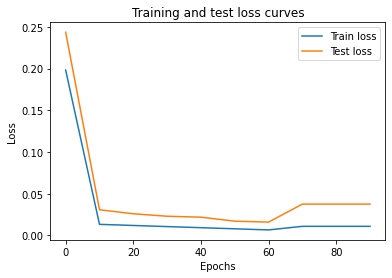

In [ ]:
plt.plot(epoch_counts, train_losses, label = "Train loss")
plt.plot(epoch_counts, test_losses, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
print(model.state_dict())
print("\n 초기에 설정한 값은:",f"weights: {weight}, bias: {bias}였지요.")

OrderedDict([('weights', tensor([0.4756])), ('bias', tensor([0.1448]))])

 초기에 설정한 값은: weights: 0.5, bias: 0.1였지요.


## 4. 훈련된 모델로 예측 값 생성하기

In [ ]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([[1.0009],
        [1.0104],
        [1.0199],
        [1.0294],
        [1.0389],
        [1.0485],
        [1.0580],
        [1.0675],
        [1.0770],
        [1.0865]])

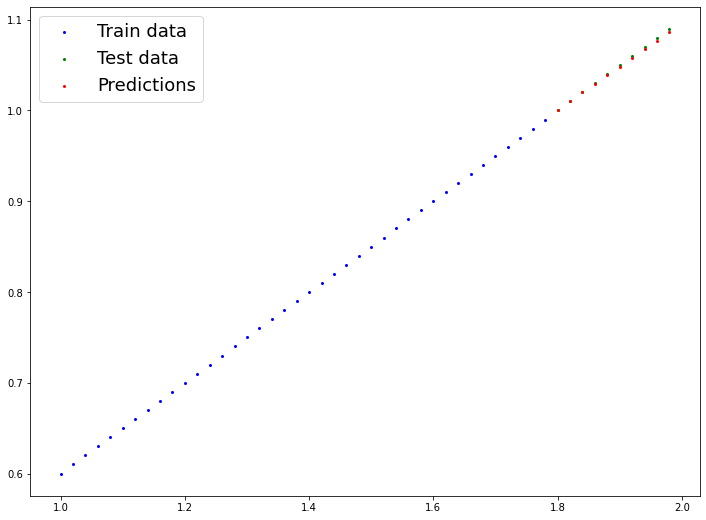

In [ ]:
plot_predictions(predictions=y_preds)

## 5. 모델 저장하고 불러오기

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "pytorch_basic_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"모델 저장 위치와 파일명: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

모델 저장 위치와 파일명: models/pytorch_basic_model.pth


In [ ]:
!ls -l models/pytorch_basic_model.pth

-rw-r--r-- 1 root root 1063 Sep 19 06:22 models/pytorch_basic_model.pth


### 모델 불러오기

In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

In [ ]:
y_preds == loaded_model_preds #학습된 모델의 예측 결과와 정말 동일한지 확인

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])